In [22]:
%matplotlib inline
import pandas as pd
#import seaborn as sns
#sns.set()

In [3]:
df = pd.read_csv('/Users/kbeelen/Documents/OtherProjects/GenderPaper-3/output/stm_T2.csv',index_col=0)

In [4]:
df.head()

,year,member,text,party,role,function,gender
0,1945,uk.m.21635,by private notice asked the prime minister w...,uk.p.Con,mp,NaN,0
1,1946,uk.m.21635,i will now address it to the leader of the h...,uk.p.Con,mp,NaN,0
2,1947,uk.m.21635,i apologise to the house i was not aware tha...,uk.p.Con,mp,NaN,0
3,1950,uk.m.21635,what was the object of the right hon gentlem...,uk.p.Con,mp,NaN,0
4,1951,uk.m.21635,is it not a fact and i do not think the prim...,uk.p.Con,mp,NaN,0


In [5]:
#df = df_all[df_all.word_count > 100]

In [6]:
import sklearn.feature_extraction.text as text

In [7]:
parl_stop_words = text.ENGLISH_STOP_WORDS.union(["hon",'gentleman','right','committee',
                                                 'member','friend','way','mr','minister','house','act'])

In [8]:
vec = text.CountVectorizer(
                lowercase=True, min_df=25, stop_words=parl_stop_words,
)
dtm = vec.fit_transform(df['text'])


In [9]:
print(f'Shape of document-term matrix: {dtm.shape}. '
f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (11272, 10318). Number of tokens 5181936


In [10]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=10, learning_method='online', random_state=1)
document_topic_distributions = model.fit_transform(dtm)

In [11]:
vocabulary = vec.get_feature_names()

In [12]:
topic_names = [f'Topic {k}' for k in range(10)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)

document_topic_distributions = pd.DataFrame(
    document_topic_distributions, columns=topic_names, index=df.index)

In [13]:
document_topic_distributions.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,0.002703,0.002703,0.344074,0.066459,0.002703,0.002703,0.002703,0.570544,0.002703,0.002704
1,0.004546,0.004547,0.004547,0.004547,0.004546,0.004547,0.004546,0.347764,0.435779,0.184630
2,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.976918,0.002565
3,0.054240,0.182180,0.000901,0.000901,0.000901,0.291608,0.000901,0.000901,0.466566,0.000901
4,0.004001,0.004001,0.004001,0.004001,0.004001,0.188345,0.004001,0.223126,0.437893,0.126631


In [14]:
document_topic_distributions.loc[0]

Topic 0    0.002703
Topic 1    0.002703
Topic 2    0.344074
Topic 3    0.066459
Topic 4    0.002703
Topic 5    0.002703
Topic 6    0.002703
Topic 7    0.570544
Topic 8    0.002703
Topic 9    0.002704
Name: 0, dtype: float64

In [15]:
document_topic_distributions.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,0.002703,0.002703,0.344074,0.066459,0.002703,0.002703,0.002703,0.570544,0.002703,0.002704
1,0.004546,0.004547,0.004547,0.004547,0.004546,0.004547,0.004546,0.347764,0.435779,0.184630
2,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.976918,0.002565
3,0.054240,0.182180,0.000901,0.000901,0.000901,0.291608,0.000901,0.000901,0.466566,0.000901
4,0.004001,0.004001,0.004001,0.004001,0.004001,0.188345,0.004001,0.223126,0.437893,0.126631


In [16]:
topic_word_distributions.loc['Topic 4'].sort_values(
        ascending=False).head(18)

women             24903.739735
disabled           7857.862799
work               7803.266418
government         6523.145591
people             6064.402283
discrimination     6012.511600
employment         5403.391524
pay                5212.426216
men                4916.385294
equal              4798.027710
time               3376.314246
equality           3331.442209
cent               3281.327276
employers          3156.009973
age                3025.446293
disability         2989.180904
service            2521.601033
make               2431.553197
Name: Topic 4, dtype: float64

In [17]:
merged = document_topic_distributions.merge(df,left_index=True, right_index=True)

In [18]:
merged.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,year,member,text,party,role,function,gender
0,0.002703,0.002703,0.344074,0.066459,0.002703,0.002703,0.002703,0.570544,0.002703,0.002704,1945,uk.m.21635,by private notice asked the prime minister w...,uk.p.Con,mp,NaN,0
1,0.004546,0.004547,0.004547,0.004547,0.004546,0.004547,0.004546,0.347764,0.435779,0.184630,1946,uk.m.21635,i will now address it to the leader of the h...,uk.p.Con,mp,NaN,0
2,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.976918,0.002565,1947,uk.m.21635,i apologise to the house i was not aware tha...,uk.p.Con,mp,NaN,0
3,0.054240,0.182180,0.000901,0.000901,0.000901,0.291608,0.000901,0.000901,0.466566,0.000901,1950,uk.m.21635,what was the object of the right hon gentlem...,uk.p.Con,mp,NaN,0
4,0.004001,0.004001,0.004001,0.004001,0.004001,0.188345,0.004001,0.223126,0.437893,0.126631,1951,uk.m.21635,is it not a fact and i do not think the prim...,uk.p.Con,mp,NaN,0


In [47]:
topic = 5
sub_df = merged[[f'Topic {topic}','gender','party']]
#sns.violinplot(sub_df.gender, sub_df[f'Topic {topic}'],inner='quartile')
#sub_df.groupby('gender').mean()

In [48]:
#sns.violinplot(sub_df.party, sub_df[f'Topic {topic}'],inner='quartile')

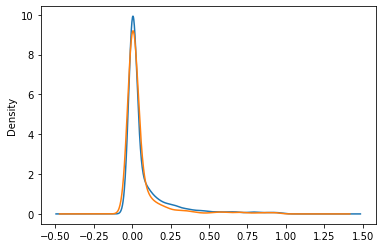

In [49]:
sub_df[sub_df.gender==0][f'Topic {topic}'].plot(kind='density')
sub_df[sub_df.gender==1][f'Topic {topic}'].plot(kind='density')

In [26]:
#sub_df = merged[['Topic 7','gender']]
#sns.violinplot(sub_df.gender, sub_df['Topic 7'],inner='quartile')

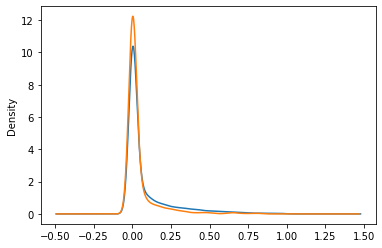

In [27]:
#sub_df[sub_df.gender==0]['Topic 7'].plot(kind='density')
#sub_df[sub_df.gender==1]['Topic 7'].plot(kind='density')

In [28]:
import os
import warnings

import arviz as az
import daft
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from causalgraphicalmodels import CausalGraphicalModel
from scipy import stats
from scipy.interpolate import griddata
from theano import shared

warnings.simplefilter(action="ignore", category=FutureWarning)

In [29]:
sex = merged['gender'].values

In [30]:
sex

array([0, 0, 0, ..., 0, 1, 1])

In [31]:
def standardize(series):
    """Standardize a pandas series"""
    std_series = (series - series.mean()) / series.std()
    return std_series

In [64]:
topic = 1
print(merged[f'Topic {topic}'].mean())
print(merged[f'Topic {topic}'].std())

0.1100034531772509
0.18981190239254114


In [90]:
topic = 4
print(merged[merged.gender==0][f'Topic {topic}'].mean())
print(merged[merged.gender==1][f'Topic {topic}'].mean())

0.10552078049403514
0.26341353793109884


In [91]:


#merged[f'Topic_{topic}_std'] = standardize(merged[f'Topic {topic}'])

with pm.Model() as m1:
    sigma = pm.Exponential('sigma',1)
    #sigma = pm.Normal('sigma',0,.5,shape=2)
    mu = pm.Normal('mu', .1,.2,shape=2)
    topic = pm.Normal('topic', mu[sex], sigma, observed=merged[f'Topic {topic}'].values)
    diff_fm = pm.Deterministic('diff',mu[0]-mu[1])
    m1_trace = pm.sample()
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


In [92]:
az.summary(m1_trace)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],0.106,0.002,0.102,0.109,0.0,0.0,5378.0,3002.0,1.0
mu[1],0.263,0.005,0.252,0.273,0.0,0.0,5488.0,2749.0,1.0
sigma,0.202,0.001,0.199,0.204,0.0,0.0,5398.0,2963.0,1.0
diff,-0.158,0.006,-0.168,-0.147,0.0,0.0,5738.0,2935.0,1.0


In [112]:
m1_trace['diff']

array([-0.15485564, -0.16190253, -0.16190253, ..., -0.14085558,
       -0.16720559, -0.15571453])

In [103]:
#help(az.plot_forest)
pd.Series(m1_trace['topic'][:,0]).plot(kind='density')
pd.Series(m1_trace['topic'][:,1]).plot(kind='density')

KeyError: 'Unknown variable topic'

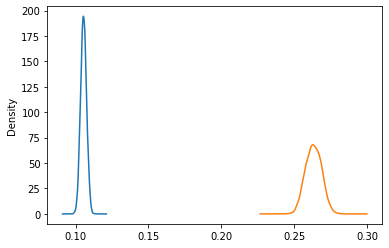

In [102]:
pd.Series(m1_trace['mu'][:,0]).plot(kind='density')
pd.Series(m1_trace['mu'][:,1]).plot(kind='density')

Got error No model on context stack. trying to find log_likelihood in translation.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a908290>],
      dtype=object)

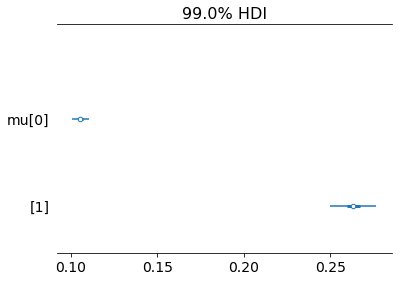

In [94]:
az.plot_forest(m1_trace,var_names=['mu'],combined=True,hdi_prob=.99)

Got error No model on context stack. trying to find log_likelihood in translation.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b0a2050>],
      dtype=object)

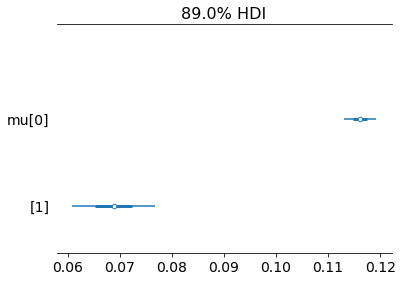

In [71]:
#az.plot_forest(m1_trace,var_names=['mu'],combined=True,hdi_prob=.89)